In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("swr.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df = df.drop(["country-year"],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [4]:
df_ex = df.rename(columns={" gdp_for_year ($) ":"GDPyearly","gdp_per_capita ($)":"GDPcapita",
                           "suicides/100k pop":"suicides100k"})
df_ex.head()

,country,year,sex,age,suicides_no,population,suicides100k,HDI for year,GDPyearly,GDPcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [5]:
#TOP-50 Country and Kazakhstan :) and 21th Century only 
#https://www.usnews.com/media/best-countries/overall-rankings-2019.pdf - source

In [6]:
#countryname = [
#    'Switzerland','Japan','Canada','Germany','United Kingdom','Sweden','Australia','United States','Norway',
#    'France','Netherlands','New Zealand','Denmark','Finland','Singapore','China', 'Belgium','Italy',
#    'Luxembourg','Spain','Ireland','South Korea','United Arab Emirates','Russian Federation','Portugal','Thailand',
#    'India','Brazil','Israel','Greece','Qatar', 'Saudi Arabia','Poland','Turkey','Mexico','Croatia',
#    'South Africa','Malaysia','Vietnam','Egypt','Czech Republic','Morocco','Indonesia','Costa Rica',
#    'Sri Lanka','Peru','Hungary','Argentina','Philippines','Kazakhstan'
#]
#sorted(countryname)
countryname = [
 'Argentina',
 'Australia',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Vietnam']


In [7]:
df1 = df_ex.copy()
df = df1.iloc[np.where(df1.country == countryname[0])]
for i, x in enumerate(countryname[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 2000]
df = df[df.year <= 2015]

In [8]:
#df

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Suiciede Per 100k')

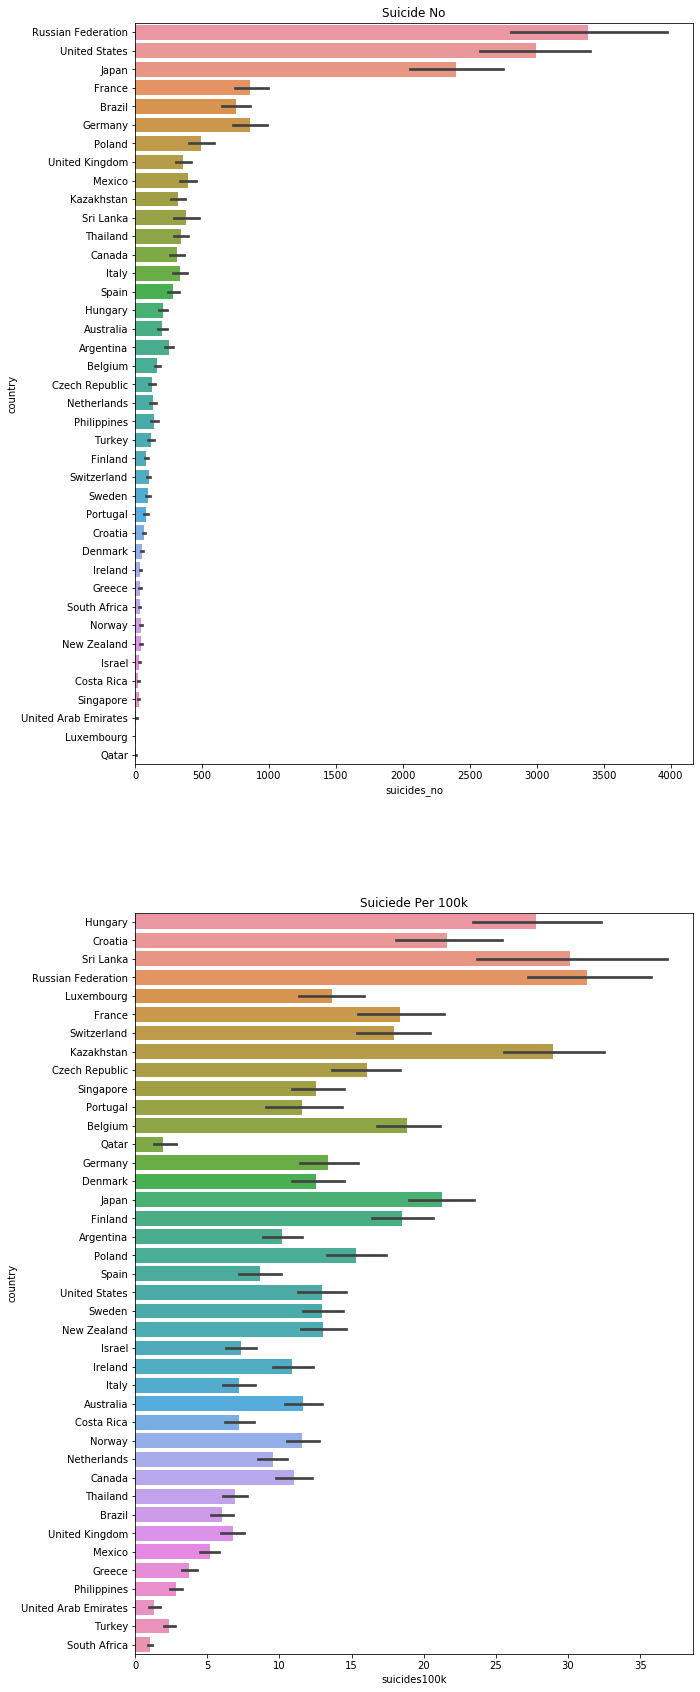

In [10]:
plt.figure(figsize=(10,30))

plt.subplot(211)
ax = sns.barplot(x="suicides_no", y="country", data=df.sort_values(by=['suicides_no'],ascending=False), orient = "h")
plt.title('Suicide No')


plt.subplot(212)
ax = sns.barplot(x="suicides100k", y="country", data=df.sort_values(by=['suicides100k'],ascending=False), orient = "h")
plt.title('Suiciede Per 100k')


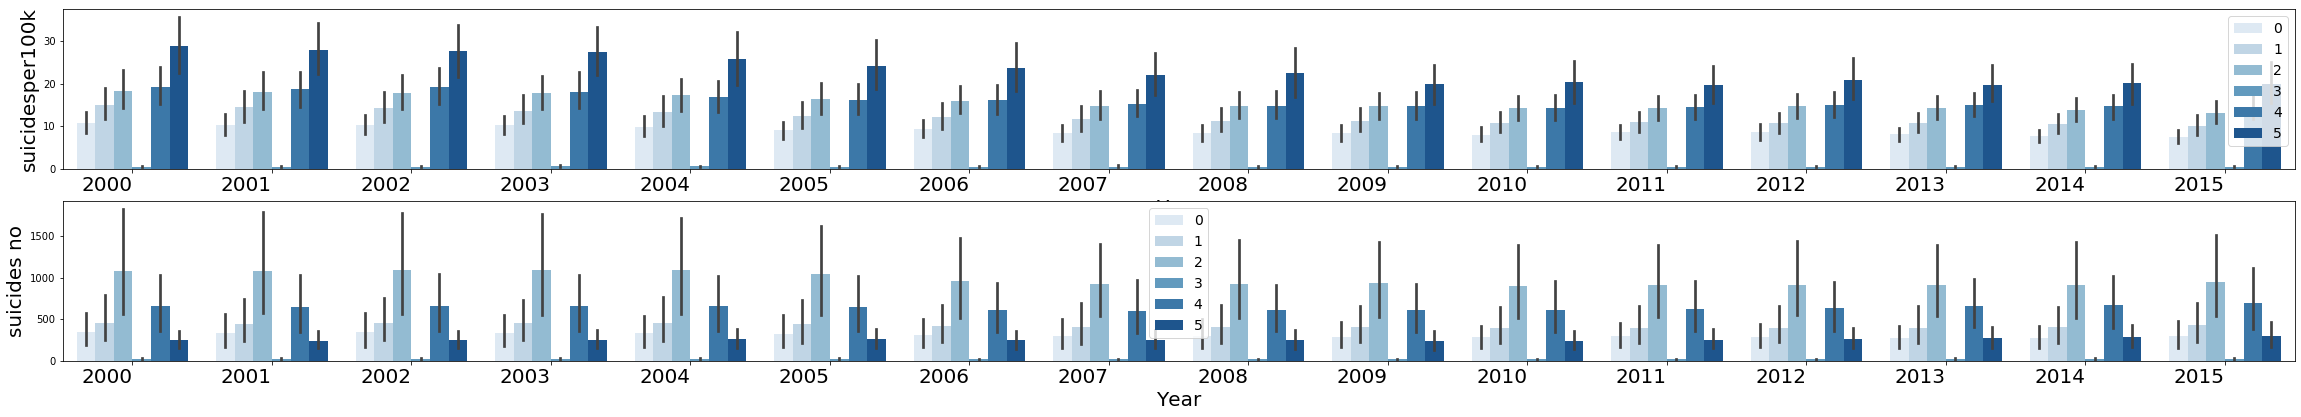

In [54]:
plt.figure(figsize=(40, 10))


plt.subplot(311)

sns.barplot(x='year', y='suicides100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Year',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='year', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides no', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=14)

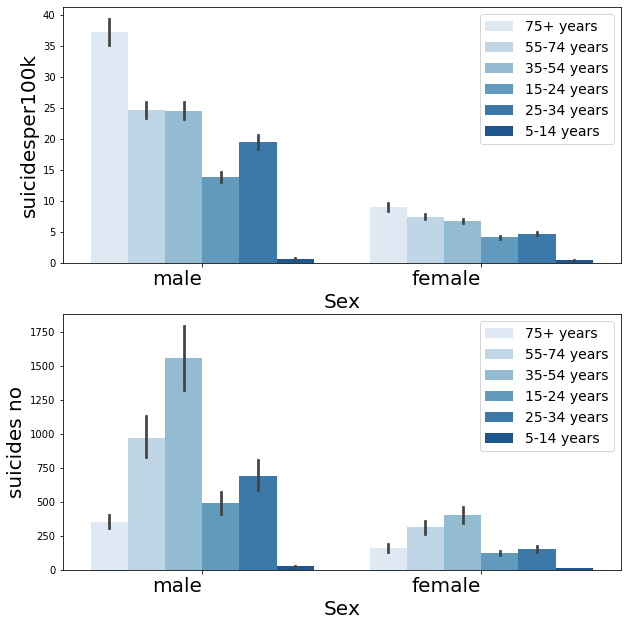

In [11]:
plt.figure(figsize=(10, 16))


plt.subplot(311)

sns.barplot(x='sex', y='suicides100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides no', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

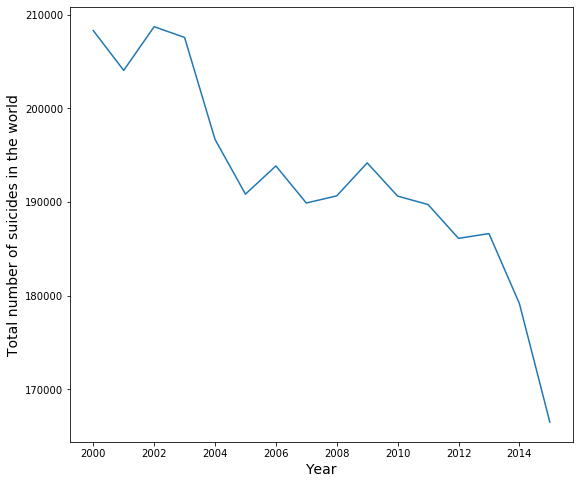

In [12]:
year = df.groupby('year').year.unique()

plt.figure(figsize=(9, 8))

totalpyear = pd.DataFrame(df.groupby('year').suicides_no.sum())

plt.plot(year.index[0:16], totalpyear[0:16])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

In [13]:
df['risk'] = df.suicides100k.copy()

df['risk'] = np.where(df.risk < df.suicides100k.mean(), 0, 1)

Text(0.5, 0, 'Suicides')

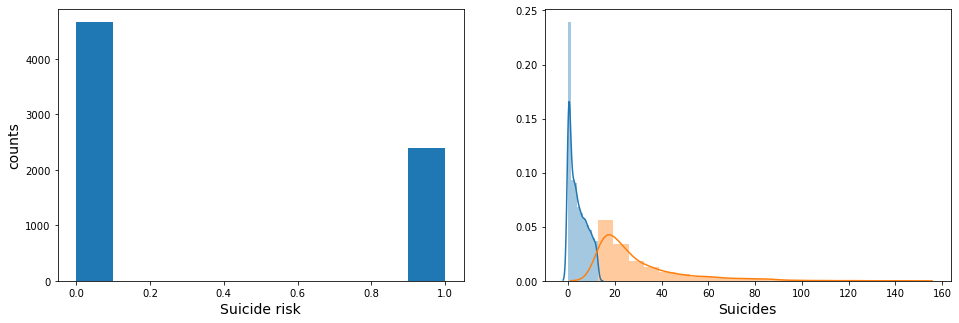

In [14]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(df.risk)
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(df.suicides100k[df.risk == 0], bins=10)
sns.distplot(df.suicides100k[df.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.country = le.fit_transform(df.country)
df.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [16]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
df.sex[df.sex == 'female'] = 0
df.sex[df.sex == 'male'] = 1
#df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
le = LabelEncoder()

df.age = le.fit_transform(df.age)
df.age.unique()

array([5, 4, 2, 0, 1, 3])

In [55]:
df.age.unique()

array([5, 4, 2, 0, 1, 3])

In [19]:
le = LabelEncoder()

df.GDPyearly = le.fit_transform(df.GDPyearly)
df.GDPyearly.unique()

array([326, 311, 582,  94, 145, 187, 268, 328, 388, 374, 428, 482, 488,
       490, 476, 507, 422, 395, 402, 443, 516, 541, 561,   1, 576,   8,
        31,  41,  44,  34,  24, 276, 275, 300, 367, 393, 399, 419, 445,
       471, 450, 449, 477, 455, 473, 483, 439, 522, 493, 467, 492, 526,
       570,   5,  32,  51,  50, 201, 215, 211, 212, 210,  55, 540, 539,
       543, 571,   0,  11,  22,  35,  42,  28,  45,  53,  56,  59, 120,
       131, 139, 151, 167, 175, 252, 303, 352, 351, 390, 424, 440, 454,
       464, 244, 264, 304, 375, 420, 438, 463, 512, 533, 518, 505, 517,
       494, 503, 498, 453, 514, 527, 554, 586,  81, 112, 135, 173, 270,
       234, 238, 260, 236, 241, 239, 171, 142, 146, 162, 250, 290, 310,
       324, 368, 386, 369, 370, 379, 371, 378, 385, 354,  90,  97, 115,
       154, 184, 233, 248, 294, 325, 291, 289, 318, 295, 313, 316, 267,
        26,  29,  38,  58, 194, 199, 205, 218, 231, 221, 217, 227, 220,
       224, 226,  62,  63, 193, 213, 225, 228, 339, 345, 347, 34

In [20]:
le = LabelEncoder()

df.generation = le.fit_transform(df.generation)
df.generation.unique()

array([1, 5, 0, 2, 4, 3])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
# Train-test split
dfqwe=df.fillna(df['HDI for year'].mean())
dfqwe

,country,year,sex,age,suicides_no,population,suicides100k,HDI for year,GDPyearly,GDPcapita,generation,risk
768,0,2000,1,5,232,525161,44.18,0.76200,326,8462,1,1
769,0,2000,1,4,602,2333377,25.80,0.76200,326,8462,5,1
770,0,2000,1,2,578,4096814,14.11,0.76200,326,8462,0,1
771,0,2000,1,0,463,3306109,14.00,0.76200,326,8462,2,1
772,0,2000,1,1,331,2602314,12.72,0.76200,326,8462,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,39,2015,0,1,1444,21555712,6.70,0.84396,165,60387,4,0
27216,39,2015,0,0,1132,21633813,5.23,0.84396,165,60387,4,0
27217,39,2015,0,5,540,11778666,4.58,0.84396,165,60387,5,0
27218,39,2015,1,3,255,21273987,1.20,0.84396,165,60387,3,0


ValueError: 12 columns passed, passed data had 2 columns

In [34]:
X = dfqwe[['country', 'sex', 'age', 'GDPcapita', 'generation']]
y = df['suicides_no']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
rf = RandomForestClassifier(n_estimators=100) 


In [37]:
rf.fit(X_train, y_train);

In [38]:
y_pred=rf.predict(X_test)

In [39]:
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.06046291922531885


In [40]:
X = dfqwe[['country', 'sex', 'age']]
y = df['suicides_no']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.06565895134624469


In [41]:
X = dfqwe[['GDPcapita']]
y = df['suicides_no']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.01653282947567312


In [42]:
X = dfqwe[['country']]
y = df['suicides_no']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.04640453418349274


In [43]:
X = dfqwe[['sex']]
y = df['suicides_no']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.0406235238545111


In [45]:
dfre=dfqwe
dfre.drop(['risk'], axis=1)
X = dfre
y = df['suicides_no']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.2569674067076051


In [50]:
dfre=dfqwe
dfre.drop(['risk'], axis=1)
X = dfre
y = df['risk']

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
rf.fit(X_train, y_train);
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 1.0


In [62]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'